In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [28]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [29]:
X.shape

(1000, 2)

In [30]:
y.shape

(1000,)

In [31]:
X[0], X[1]

(array([ 1.19992668, -1.0930315 ]), array([0.89622253, 0.41673845]))

In [32]:
df = pd.DataFrame(X, columns=['X1', 'X2'])
df.head()

,X1,X2
0,1.199927,-1.093031
1,0.896223,0.416738
2,-1.225342,-1.357874
3,0.883357,0.887523
4,-1.929886,1.211725


In [33]:
df['Target'] = y
df.head()

,X1,X2,Target
0,1.199927,-1.093031,0
1,0.896223,0.416738,1
2,-1.225342,-1.357874,0
3,0.883357,0.887523,1
4,-1.929886,1.211725,1


<AxesSubplot: >

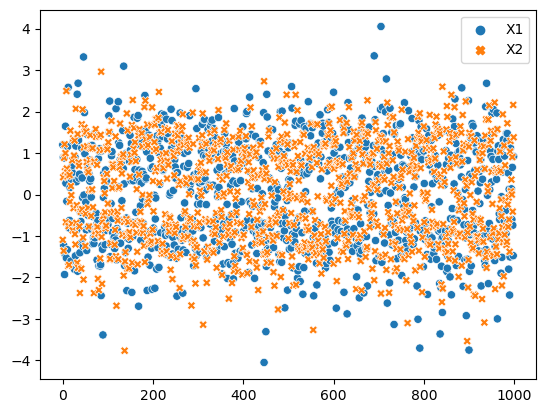

In [34]:
sns.scatterplot(df.iloc[:,:-1])

<AxesSubplot: xlabel='X1', ylabel='X2'>

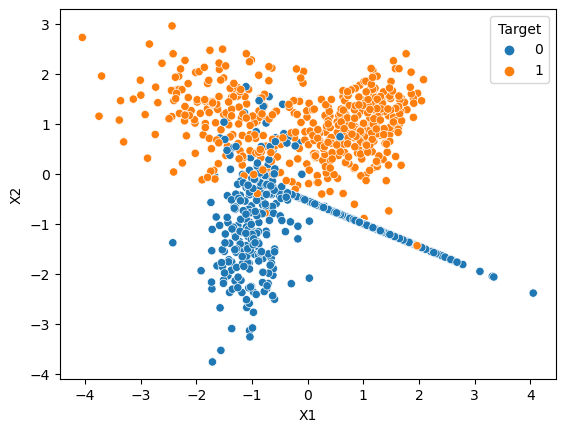

In [35]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['Target'])

In [26]:
from sklearn.model_selection import train_test_split as tts

In [27]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.svm import SVC

In [13]:
classifier = SVC(kernel='linear')

In [14]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.93
[[92 10]
 [ 4 94]]


### GridSearch CV

In [44]:
params = {
    "C":[0.1,1,10,100,1000], 
    "gamma":[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear']
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [49]:
svc = SVC()
classifier = GridSearchCV(svc, params, cv=5, scoring='accuracy', verbose=4)

In [50]:
classifier.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.925 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.906 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.925 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.906 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.894 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.925 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=4)

In [48]:
classifier.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}